# REGRESIÓN LINEAL

## 1) introducción 

El presente cuaderno tiene como objetivo describir los rasgos principales de el modelo de Regresión lineal, como uno de los mas sencillos y de fácil implementación a nivel de machine learnning, específicamente en el caso de algoritmos supervisados (de regresión).

## 2) Historia 

A partir de aproximadamente la primera mitad del sigo XVIII, para el año 1750, Tobias Mayer planteó que la única manera de poder obtener la solución a sistemas de ecuaciones era partiendo del hecho de tener __Nro ecuaciones = Nro de incógnitas__ (para sistemas de ecuaciones homogéneas). Por el año 1770, Ioseph Boscovich abrió el camino de la historia de las regresiones, mediante la publicación de la *Regresión Cuantíl*  en la que daba protagonismo a la *mediana condicionada* (claramente previa a la *media condicionada* y que se encuentra mucho mas difundida en la actualidad) en el proceso de determinar la figura de la Tierra con medidas de arco. 

![Imagen](https://upload.wikimedia.org/wikipedia/commons/b/bc/RuggieroBoskovichBettera.jpg)  
Ioseph Boscovich

Posteriormente, ante la problemática de situaciones en las que para problemas reales, se presentaban mas observaciones que incógnitas, Legendre en 1805, proporcionó una aportación practicamente definitiva del Método de Mínimos Cuadrados, solución que se usaría mas adelante como método de determinación del error para situaciones específicas, a pesar de que este, tenía argumentos mas de tipo algebráico que estadístico. En la misma época, en 1809, Gauss publica su *Theoría Motus Corporum Coelestium*, en la que realizó un trabajo análogo al de Legendre, pero empleando cuartas y sextas potencias y, aclarando que el uso de la segunda potencia, ya había sido empleada por él, desde 1795 (previo a Legendre)  

La __Regresión__, adapta su nombre de estudios realizados para determinar la relación entre estaturas de padres e hijos y __lineal__, pues permite obtener una predicción con comprtamiento "lineal" y con el fin de distinguirla de los demás modelos regresivos que se conocen (hoy en dia se tiene, regresión logística, polonomial, etc.)

## 3) Planteamiento del Algoritmo

Teniendo un conjunto de datos que aparéntemente cuenten con relación de directa rpoporcionaidad, se puede recurrir a la __Regresión Lineal__ para poder obtener un medio de prónostico de datos nuevos. Esta se puede resumir en 3 pasos:  
* 1) empleo de Mínimos Cuadrados para encontrar la mejor recta que se adapte a los puntos  
    * 1.1) Se elige la mejor recta $y=w_0+x_1w_1+x_2w_2+...+x_nw_n$ (o hiperplano), es decir, la que que tenga la menor "diferencia al cuadrado" entre los puntos y dicha recta (o hiperplano), es decir $(diferencia)^2 = \sum_i (yreal_i - ymodelo_i)^2$ (siempre midiendo distancias en el eje de salida o de "etiqueta" y empleando métrica euclideana). Para dicha "mejor recta" se calculan la pendiente ($w_1$) y su sesgo ($w_0$), los cuales determinan los parámetros del modelo (para el caso de hiperplanos se debe hacer para tdos los parámetros, es decir, desde $w_0$ hasta $w_n$). Para encontrar esa menor "diferencia al cuadrado", se deriva la expresión respecto a cada parámetro ($w_0$, $w_1$, ... $w_n$) y con dicha derivada se ajusta el parámetro mediante una *Tasa de aprendizaje* hasta que la diferencia de los cuadrados no cambie (y sea un valor mínimo)
    
    ![Imagen](https://www.scielo.sa.cr/img/revistas/tem/v29s5//0379-3982-tem-29-s5-33-gf3.jpg)
    
* 2) Cálculo de $R^2$  
* 3) Cálculo del P-valor para $R^2$ (el P-Valor se empleará para determinar si $R$ es estadísticamente significante)

## 4) Ejemplo de regresión lineal real

A continuación, se plantea el realizar un modelo de regresión lineal para la data proveniente de una empresa desconocida, en la que se busca establecer la relación entre la inversión monetaria en publicidad en distintos medios (TV, radio y periódico) y las ventas, razón por la cual, para el ejercicio, se tomarán las inversiones en publicidad televisada.

In [2]:
from sklearn.linear_model import LinearRegression     # Para el modelo de regresión lineal
from sklearn.model_selection import train_test_split  # Para la selección de datos de entrenamiento y de prueba
import pandas as pd
import numpy as np
import os                                             # Para la función "path.join()" que permite unir rutas si espacios
import matplotlib.pyplot as plt

In [4]:
ruta_principal = "D://carlos/3_udemy/python-ml-course-master/datasets"  # Tomamos la Ruta de mi disco D para cargar el DataSet
nombre_archivo = "ads//Advertising.csv"                                 # Elegimos e archivo en específico
ruta_completa = os.path.join(ruta_principal, nombre_archivo)            # Concatenamos la ruta

df = pd.read_csv(ruta_completa)                                         # creamos DataFrame con el Dataset elegido
df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [6]:
var_y = 'Sales'         # variable etiqueta o de salida "y"
var_x1 = 'TV'           # variable predictora o variable "x"

predict = df[[var_y,var_x1]]
predict.head(2)

,Sales,TV
0,22.1,230.1
1,10.4,44.5


In [8]:
entrenamiento, testeo = train_test_split(predict, test_size = 0.3, shuffle = True) #dividimos los datos de entrenamiento y test con la librería sklearn

In [17]:
modelo = LinearRegression()                                          # Corremos el modelo
modelo.fit(X = entrenamiento[[var_x1]] ,y = entrenamiento[var_y])    # Se emplean los datos de entrenamiento
wo = modelo.intercept_                                               # Obtenemos el parámetro de punto de corte sobre el eje "y" de salida
w1 = float(modelo.coef_)                                             # Obtenemos el parámetro que multiplica la variable "x" de entrada
print("y =",wo,"+ x",w1)                                             # Imprimimos la ecuación del modelo lineal

testeo['y modelo'] = wo + w1*testeo[var_x1]                          # Con los datos de test y los parámetros obtenidos en el modelo, calculamos
testeo['y modelo scikit'] = modelo.predict(X = testeo[[var_x1]])     # la salida del modelo para el testeo
testeo.head(3)                                                       

y = 7.293696754837309 + x 0.046705550080395376


<ipython-input-17-bf4e1408c44b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testeo['y modelo'] = wo + w1*testeo[var_x1]                          # Con los datos de test y los parámetros obtenidos en el modelo, calculamos
<ipython-input-17-bf4e1408c44b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testeo['y modelo scikit'] = modelo.predict(X = testeo[[var_x1]])        # la salida del modelo para el testeo


,Sales,TV,y modelo,y modelo scikit
87,16.0,110.7,12.464001,12.464001
175,27.0,276.9,20.226464,20.226464
110,13.4,225.8,17.839810,17.839810


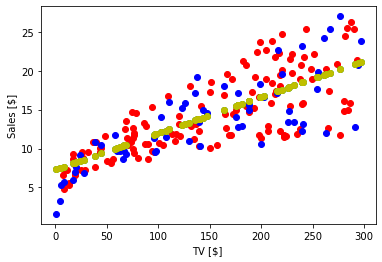

In [18]:
plt.plot(entrenamiento[var_x1],entrenamiento[var_y], 'ro')
plt.plot(testeo[var_x1],testeo[var_y], 'bo')
plt.plot(testeo[var_x1],testeo['y modelo'], 'go')
plt.plot(testeo[var_x1],testeo['y modelo scikit'], 'yo')
plt.xlabel('TV [$] ')
plt.ylabel('Sales [$]');

## 5) Conclusiones

* la regresión linal permite la predicción de datos con bastante certeza siempre y cuando las variables de entrada y variables de salida tenga una fuerte relación de proporcionalidad, de lo contrario, la predicción no será muy fiel a la realidad y existirán errores muy grandes (como el presentado en la figura anterior)
* La elección de datos de test y de entrenamiento de un mismo dataset permite entrenar el modelo y posteriormente testearlo con datos provenientes de la misma naturaleza, lo cual es imprescindible, dado que el usar información proveniente de otro dataset, no tendría sentido y el resultado no formade tendría comparación
* existen dos liberías que permiten el modelamiento de una regresión lineal: scikitlearn y statsmodels, si bien ambas entregan resultados iguales, la primera perite acceder a los resultados de una manera mas rápida y práctica, por lo cual representa mayor ventaja a la hora de realizar nuevos modelos.

## 6) Bibliografía

[1] http://gaceta.rsme.es/english/abrir.php?id=1519  
[2] https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal#cite_note-etim-2